[12.377777777777778, 19.833333333333332, 19.711111111111112, 20.744444444444444, 15.188888888888888, 22.2, 16.1, 20.122222222222224, 16.866666666666667, 20.41111111111111, 16.366666666666667, 18.977777777777778, 21.066666666666666, 20.288888888888888, 12.044444444444444, 21.4, 22.2, 18.155555555555555, 14.311111111111112, 23.944444444444443, 14.38888888888889, 13.977777777777778, 14.88888888888889, 22.166666666666668, 17.11111111111111, 14.38888888888889, 19.177777777777777, 15.433333333333334, 15.644444444444444, 12.044444444444444, 20.877777777777776, 11.71111111111111, 17.8, 23.455555555555556, 17.68888888888889, 13.588888888888889, 23.81111111111111, 17.033333333333335, 20.41111111111111, 16.92222222222222, 14.244444444444444, 19.866666666666667, 18.122222222222224, 21.22222222222222, 12.911111111111111, 16.288888888888888, 12.61111111111111, 20.877777777777776]
48


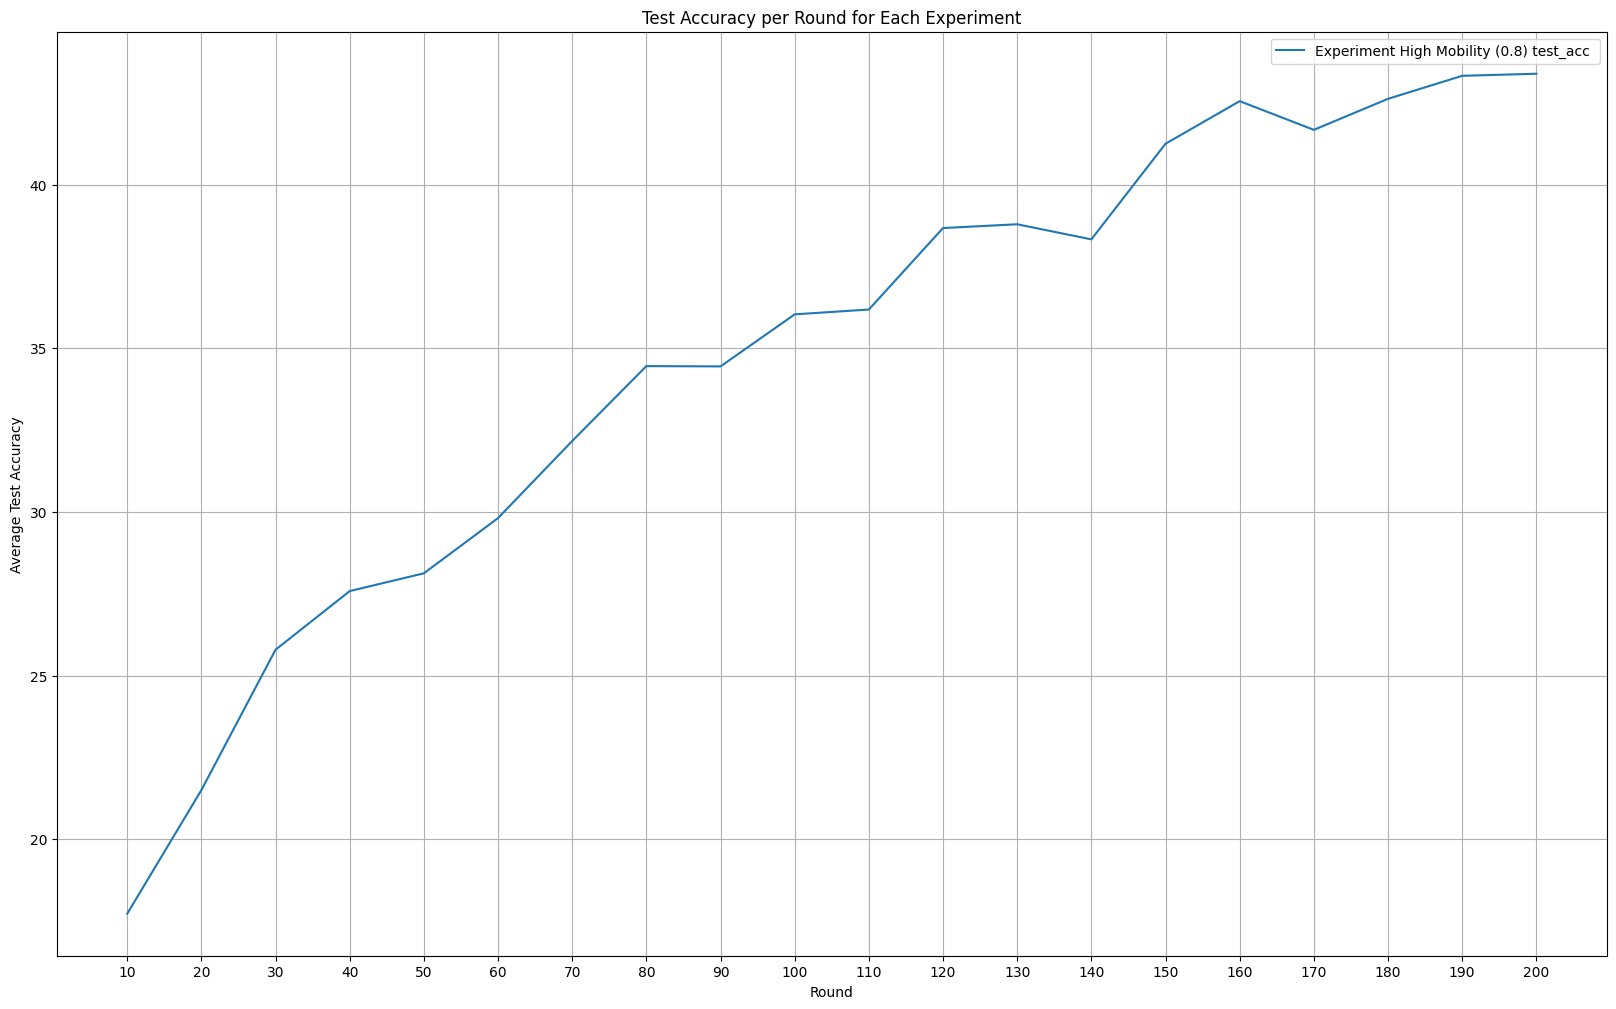

In [7]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt    
from collections import defaultdict


def average_of_first_percent(lst, p):
    n = int(len(lst) * p)
    return np.mean(lst[:n])

def average_of_last_percent(lst, p):
    n = int(len(lst) * p)
    return np.mean(lst[-n:])

num_nodes = 48
# rounds_cutoff = float('inf')
rounds_cutoff = 200
experiments = {
    # 0.0: ".saved_experiments/2024-05-30T17:27-dynamic_48_0_0.txt/machine0",
    0.8: ".saved_experiments/2024-05-30T17:50-dynamic_48_0_8.txt/machine0",
}
experiment_names = {
    # 0.0: "High Mobility (0.0)",
    0.8: "High Mobility (0.8)",
}
data = {}

for experiment, dir in experiments.items():
    data[experiment] = {}
    for i in range(num_nodes):
        file_path = os.path.join(dir, f"{i}_results.json")
        if os.path.exists(file_path):
            with open(file_path, "r") as file:
                content = json.load(file)

                for statistic, rounds in content.items():
                    if statistic not in data[experiment]:
                        data[experiment][statistic] = {}

                    for round, value in rounds.items():
                        if int(round) > rounds_cutoff:
                            continue

                        if round not in data[experiment][statistic]:
                            data[experiment][statistic][round] = []
                        data[experiment][statistic][round].append(value)


statistics = ["test_acc"]
averages = {}
high_mobility_averages = defaultdict(lambda: defaultdict(dict))
low_mobility_averages = defaultdict(lambda: defaultdict(dict))
for experiment in data:
    averages[experiment] = {}
    for statistic in statistics:
        if statistic not in averages[experiment]:
            averages[experiment][statistic] = {}

        for round, values in data[experiment][statistic].items():
            averages[experiment][statistic][round] = np.mean(values)

            if round == "10":
                print(values)
                print(len(values))

            high_mobility_proportion = experiment
            low_mobility_proportion = 1 - experiment
            high_mobility_averages[experiment][statistic][round] = average_of_first_percent(values, high_mobility_proportion)
            low_mobility_averages[experiment][statistic][round] = average_of_last_percent(values, low_mobility_proportion)

plt.figure(figsize=(20, 12))
def plot_averages(experiment_names, averages, extra_info=""):
    for experiment, statistics_dict in averages.items():
        for statistic in statistics:
            rounds, acc_values = zip(*averages[experiment][statistic].items())
            plt.plot(rounds, acc_values, label=f"Experiment {experiment_names[experiment]} {statistic} {extra_info}")

plot_averages(experiment_names, averages)

plt.xlabel("Round")
plt.ylabel("Average Test Accuracy")
plt.title("Test Accuracy per Round for Each Experiment")
plt.legend()
plt.grid(True)
plt.show()


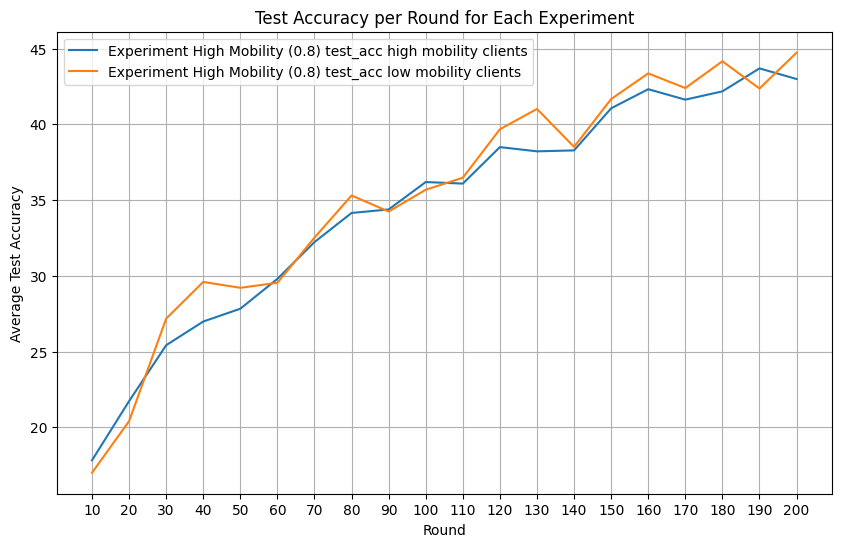

In [8]:
plt.figure(figsize=(10, 6))

plot_averages(experiment_names, high_mobility_averages, 'high mobility clients')
plot_averages(experiment_names, low_mobility_averages, 'low mobility clients')

plt.xlabel("Round")
plt.ylabel("Average Test Accuracy")
plt.title("Test Accuracy per Round for Each Experiment")
plt.legend()
plt.grid(True)
plt.show()
